### Title: Iris Flower Classification
Iris Flower Classification
<hr>
<strong>OIBSIP Task No : 01</strong><br>
<hr>


## 01 Data and Packages Loading

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<p> Here , "Id" column is unnecessary,<br>
    So, we are going to drop this column from our dataset</p>

In [4]:
iris.drop('Id', axis=1, inplace=True)

In [5]:
print(f"""
    Iris columns : {iris.columns}
    """)


    Iris columns : Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
    


## 02 Data Preprocessing


<p> Target Variable = <b>Species</b> </p>
<p> Checking if any null values exists or not.</p>
<p> 

In [6]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h3>Info and Describe </h3>

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 03 Data Splitting

In [9]:
target_variable = 'Species'
iris[target_variable]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [10]:
X = iris.drop(target_variable, axis=1)
y = iris[target_variable]

In [11]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 04 Model Implementing

In [12]:
rgr = LogisticRegression()

In [13]:
model = rgr.fit(X_train , y_train)

In [14]:
predictions = model.predict(X_test)

In [15]:
predictions.shape

(30,)


<h4>Let's check if our model is correctly working or not.</h4>


<p>Check the given data.</p>


<ul>
    <li>SepalLengthCm : <b>5.1</b></li>
    <li>SepalWidthCm  : <b>3.5</b></li>
    <li>PetalLengthCm : <b>1.4</b></li>
    <li>PetalWidthCm  : <b>0.2</b></li>
    
</ul>

</p>Output : <strong>Iris-setosa</strong> </p>

In [16]:
data = [5.1, 3.5, 1.4, 0.2]

In [17]:

model.predict([data])

array(['Iris-setosa'], dtype=object)

<i>Now we can say that the model is predicting the correct output.</i>

## 05 Model Score

In [18]:
model_score = accuracy_score(y_test, predictions)
print("Accuracy Score : " , model_score)

Accuracy Score :  1.0


## 06 Visulization

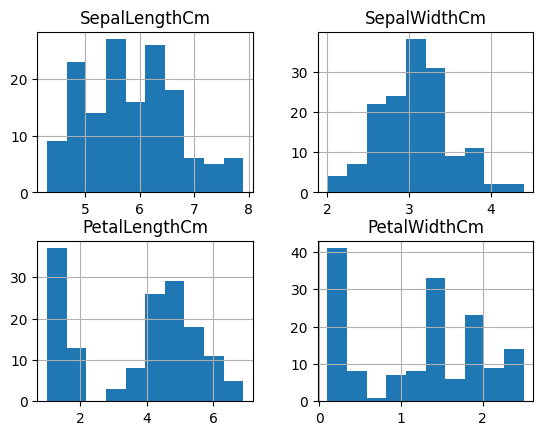

In [19]:
iris.hist()
fig = plt.gcf()
plt.show()

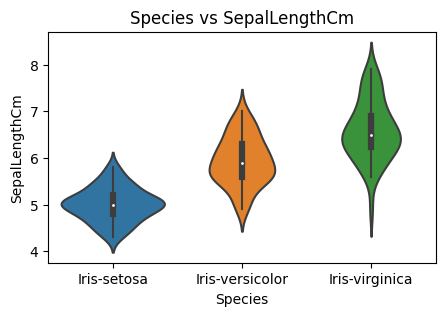

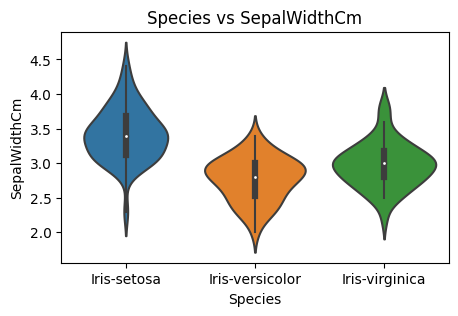

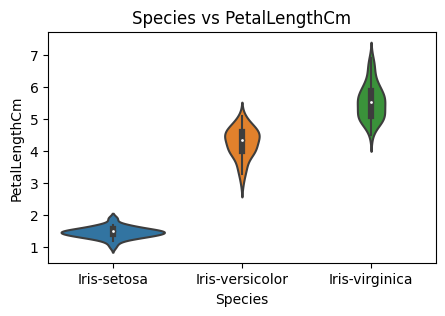

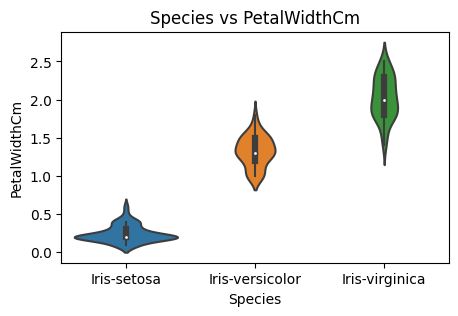

In [20]:

def violin_plot_for_iris(x:pd.DataFrame=None, y:pd.DataFrame=None, data:pd.DataFrame=None):
    plt.figure(figsize=(5,3))
    plt.title(f"Species vs {y}")
    _ = sns.violinplot(x=x, y=y, data=data)
    plt.gcf()
    plt.show()

y_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    
for columns in y_cols:  
    violin_plot_for_iris(x=iris.Species, y=columns, data=iris)


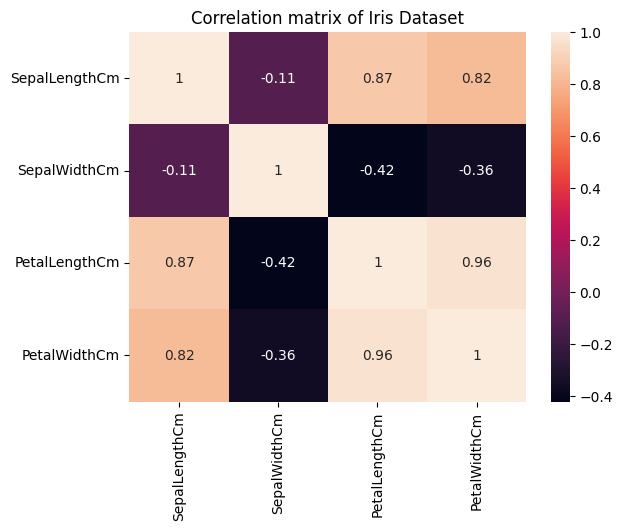

In [21]:
plt.title("Correlation matrix of Iris Dataset")
sns.heatmap(iris.corr(), annot=True)
plt.show()